In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Iris.csv')
df = df.drop('Id', axis = 1)

In [4]:
X, _ = make_moons(n_samples=300, noise=0.1)

In [120]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
sc = StandardScaler()
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df_scaled = sc.fit_transform(df)
X_scaled = sc.fit_transform(X)
petal_features = df[['PetalLengthCm', 'PetalWidthCm']]
petal_features_scaled = sc.fit_transform(petal_features)

In [126]:
ssd = []

for k in range(2,10):

    model = KMeans(n_clusters=k)


    model.fit(df_scaled)

    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

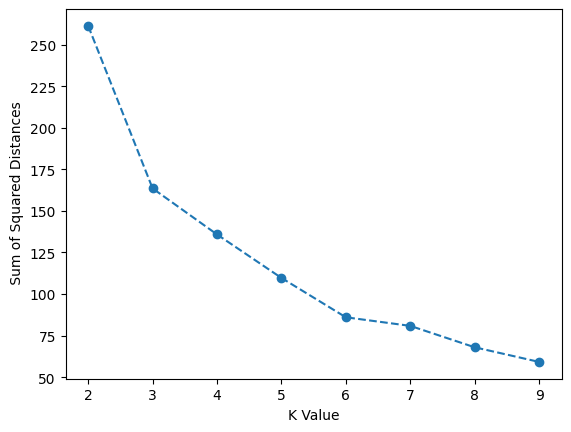

In [127]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [6]:
model = KMeans(n_clusters=3)
cluster_labels = model.fit_predict(petal_features_scaled)
silhouette_score(petal_features_scaled, cluster_labels)

0.6736179401065728

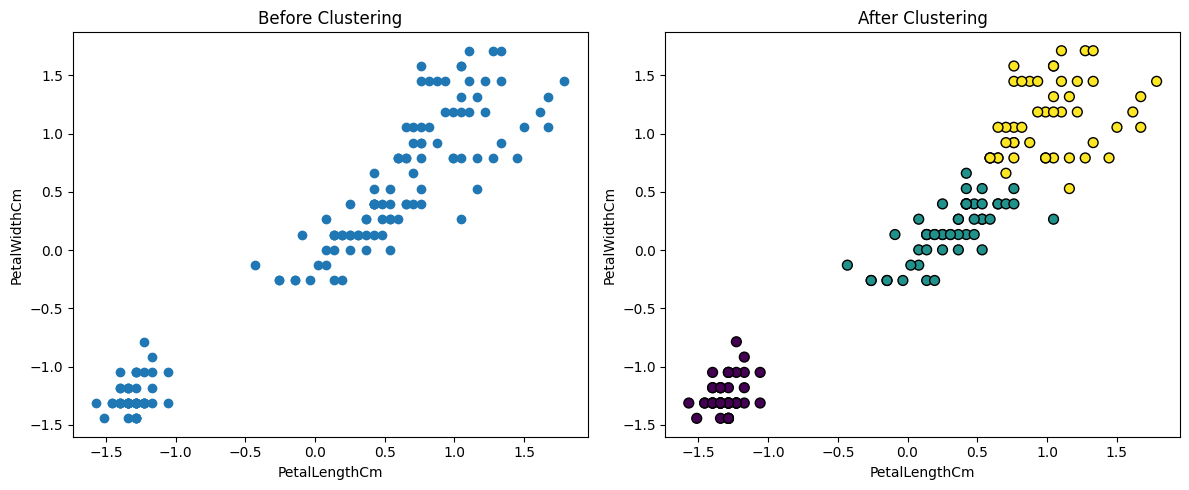

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(petal_features_scaled[:, 0], petal_features_scaled[:, 1])
plt.title("Before Clustering")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")




plt.subplot(1, 2, 2)
plt.scatter(petal_features_scaled[:, 0], petal_features_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.title("After Clustering")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")


plt.tight_layout()
plt.show()

In [122]:
ssd = []

for k in range(2,10):

    model = KMeans(n_clusters=k)


    model.fit(X_scaled)

    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

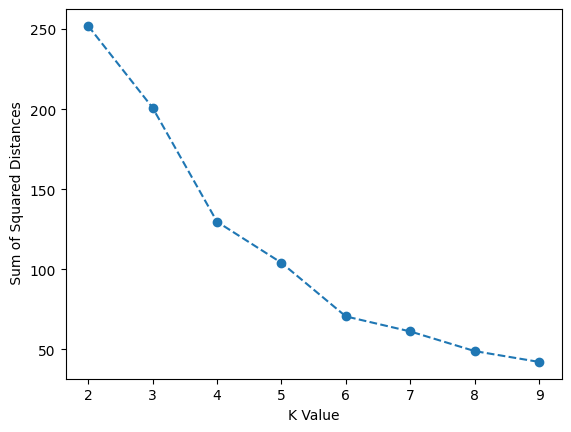

In [123]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [159]:
model = KMeans(n_clusters=4)
cluster_labels = model.fit_predict(X_scaled)
silhouette_score(X_scaled, cluster_labels)

0.4136369692107412

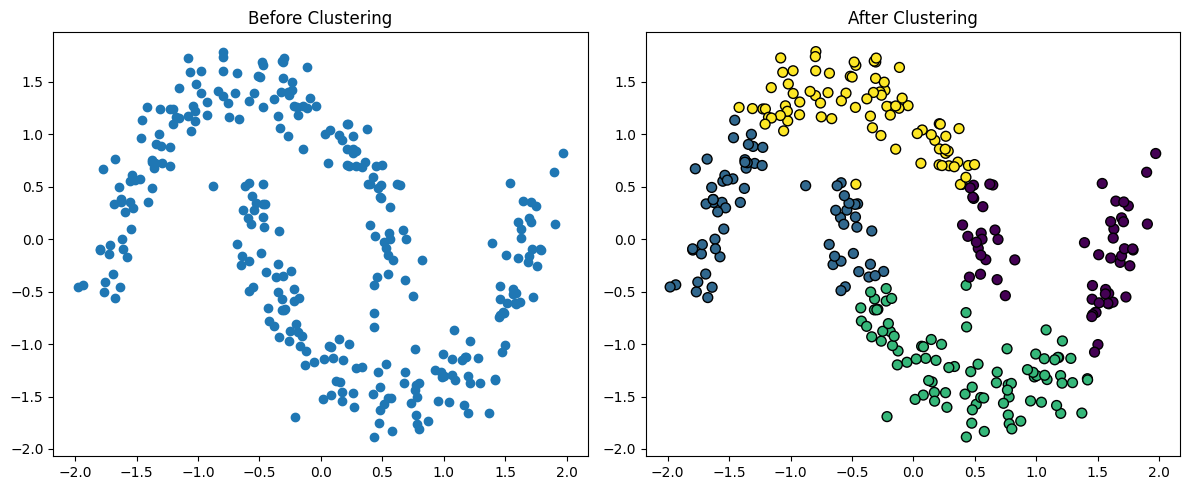

In [160]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title("Before Clustering")


plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.title("After Clustering")


plt.tight_layout()
plt.show()

In [149]:
num_cluster= np.arange(2,20)
scores=[]
for k in num_cluster:
    model = AgglomerativeClustering(n_clusters=k)
    cluster_labels = model.fit_predict(df_scaled)
    scores.append(silhouette_score(df_scaled, cluster_labels))

print(scores)

[0.590106337997557, 0.4823419657699638, 0.4388123528223146, 0.4467249701821163, 0.3946334458024547, 0.3791068014363896, 0.38059662288770574, 0.3846815700224764, 0.36027497334563435, 0.35571096330998625, 0.3517784607931329, 0.355605362762399, 0.36038651468038, 0.36596535330947016, 0.35396511037713535, 0.34771932897065055, 0.34386635518042524, 0.34021937565772853]


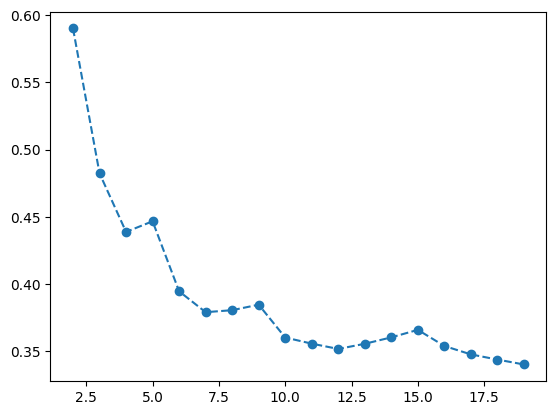

In [150]:
plt.plot(range(2,20),scores,'o--')


In [155]:
model = AgglomerativeClustering(n_clusters=2)
cluster_labels = model.fit_predict(petal_features)
silhouette_score(petal_features, cluster_labels)

0.590106337997557

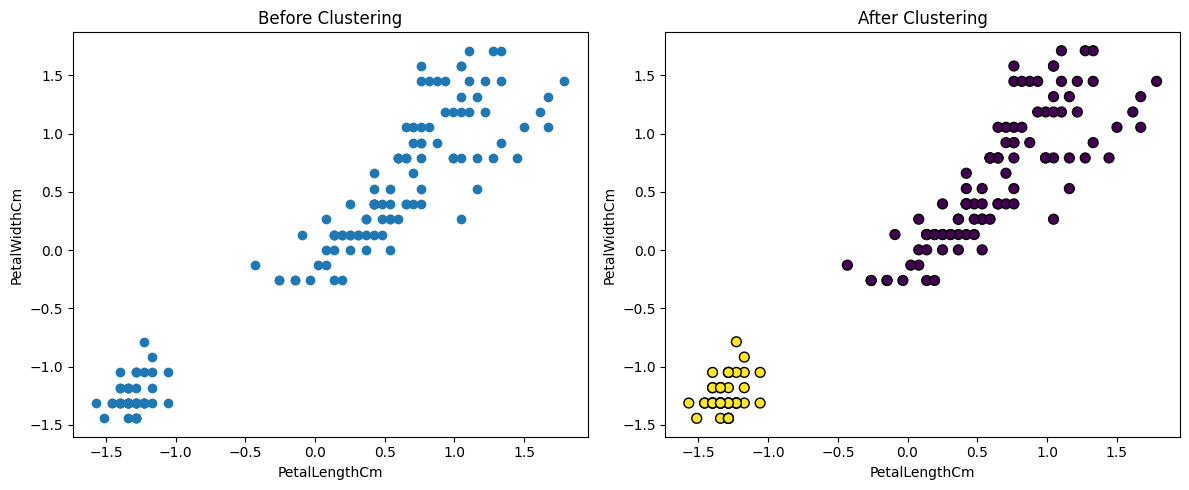

In [156]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(petal_features_scaled[:, 0], petal_features_scaled[:, 1])
plt.title("Before Clustering")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")


plt.scatter(petal_features_scaled[:, 0], petal_features_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.title("After Clustering")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")


plt.tight_layout()
plt.show()

In [151]:
num_cluster= np.arange(2,20)
scores=[]
for k in num_cluster:
    model = AgglomerativeClustering(n_clusters=k)
    cluster_labels = model.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, cluster_labels))

print(scores)

[0.44230540955569647, 0.3617374152114524, 0.3968089741275643, 0.4182780500266079, 0.46821508603164524, 0.4478168176696369, 0.44743603808634114, 0.4403148173391251, 0.4363589873376829, 0.4391615883021738, 0.44394801045086135, 0.44680272899098533, 0.43581871846139547, 0.4406956294034137, 0.43375412171285954, 0.4277800825886823, 0.43160522107263244, 0.42860511169253823]


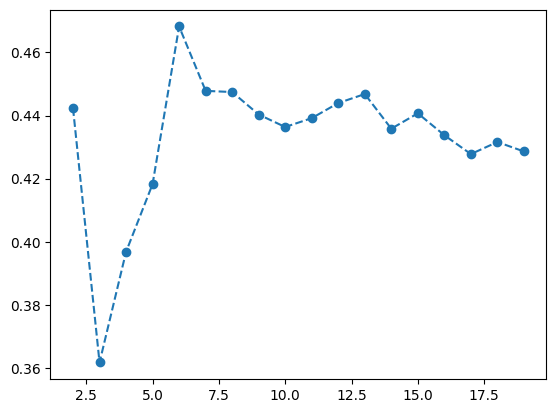

In [152]:
plt.plot(range(2,20),scores,'o--')

In [157]:
model = AgglomerativeClustering(n_clusters=6)
cluster_labels = model.fit_predict(X_scaled)
silhouette_score(X_scaled, cluster_labels)

0.46821508603164524

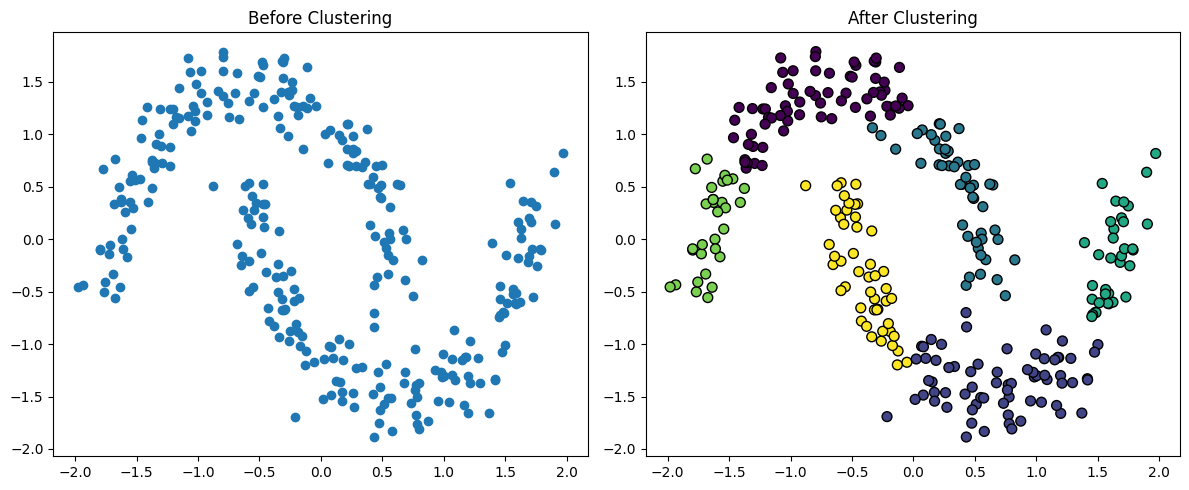

In [158]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title("Before Clustering")


plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.title("After Clustering")


plt.tight_layout()
plt.show()

Text(0.5, 0, 'Epsilon Value')

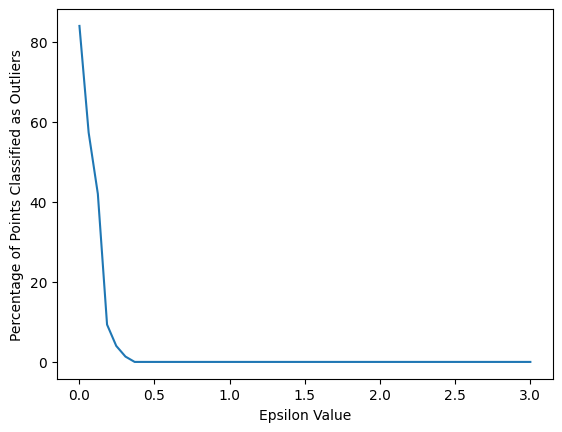

In [10]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):

    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(petal_features_scaled)


    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)

    outlier_percent.append(perc_outliers)

sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [11]:
dbscan = DBSCAN(eps=0.25)
cluster_labels = dbscan.fit_predict(petal_features_scaled)
silhouette_score(petal_features_scaled, cluster_labels)

0.4488488089664758

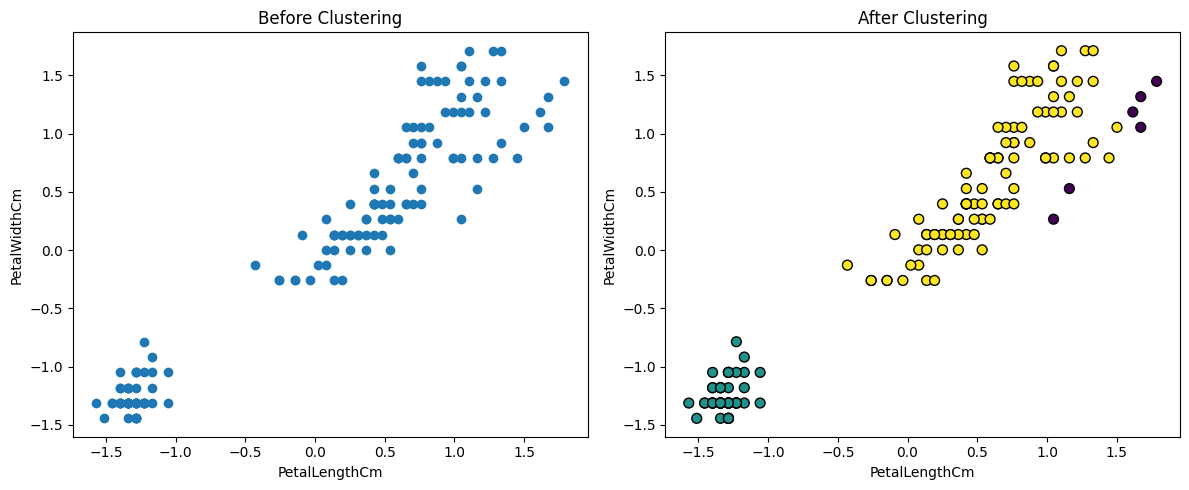

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(petal_features_scaled[:, 0], petal_features_scaled[:, 1])
plt.title("Before Clustering")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")


plt.subplot(1, 2, 2)
plt.scatter(petal_features_scaled[:, 0], petal_features_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.title("After Clustering")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")


plt.tight_layout()
plt.show()

Text(0.5, 0, 'Epsilon Value')

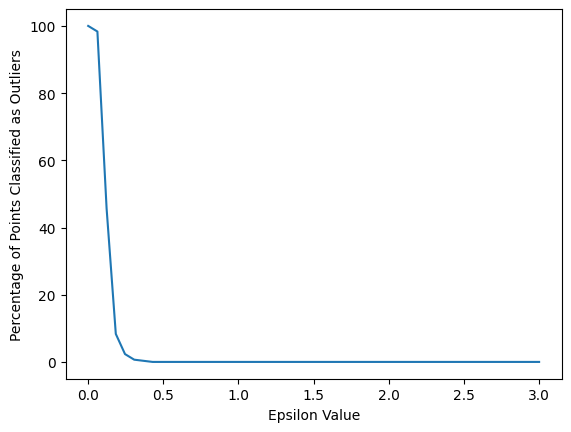

In [139]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):

    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(X_scaled)


    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)

    outlier_percent.append(perc_outliers)

sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [145]:
dbscan = DBSCAN(eps=0.3)
cluster_labels = dbscan.fit_predict(X_scaled)
silhouette_score(X_scaled, cluster_labels)

0.2778147231470391

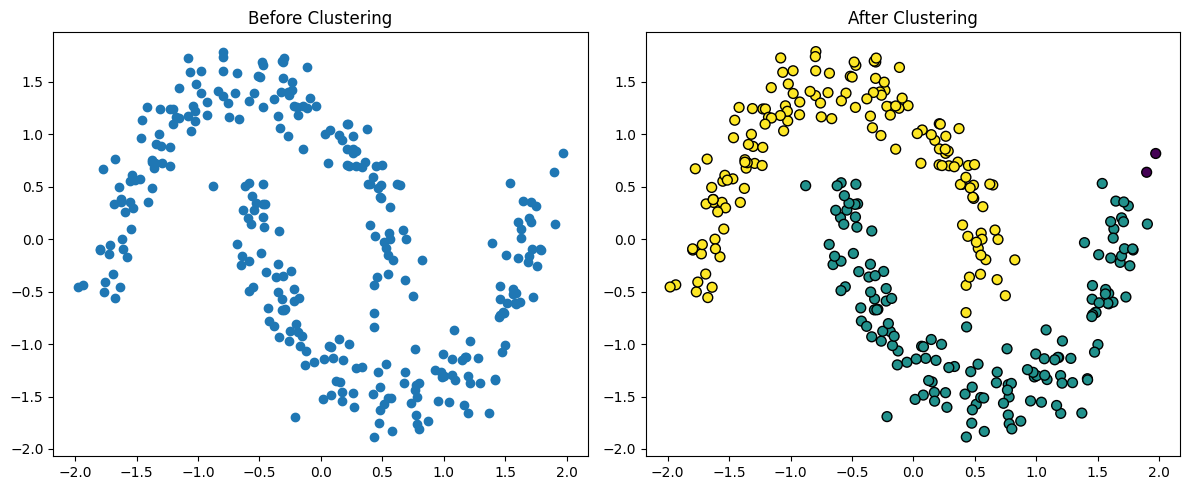

In [146]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title("Before Clustering")


plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.title("After Clustering")


plt.tight_layout()
plt.show()

In [161]:
#KMeans is the most suitbale for the Iris dataset
#DBSCAN is the most suitbale for the Moons dataset

In [167]:
all_features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

all_features_scaled = sc.fit_transform(all_features)

kmeans = KMeans(n_clusters=3)
clusters_full = kmeans.fit_predict(all_features_scaled)

df['Cluster_All_Features'] = clusters_full


df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_All_Features
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
